In [ ]:
####### IRIS - Unsupervised Learning - Predicting Optimum Number of Clusters ############
##### Code Written by Komal Nagarajan ##########

In [ ]:
##Importing packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
##########  SECTION 1 - Loading the Dataset ##########

In [ ]:
##Loading the IRIS dataset
input_data = pd.read_csv('/content/Iris.csv')

In [ ]:
##########  SECTION 2 - Understanding the Data ##########

In [ ]:
##Finding the columns in the dataset
input_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
##Data Information
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
##Data Summary
input_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Displaying the first few rows
input_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
##Identifying Different labels in the dataset
input_data['Species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
##Checking distribution of data 
input_data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

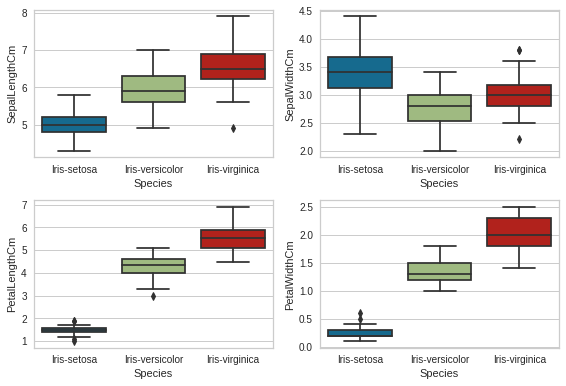

In [ ]:
##Box plot of the different Numerical Inputs
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = input_data, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = input_data, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = input_data, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = input_data,  order = cn, ax = axs[1,1]);
fig.tight_layout(pad=1.0);

In [ ]:
##########  SECTION 3 - Preparing the Dataset for Machine Learning task ##########

In [ ]:
##Preparing input data for Machine learning model
x = input_data.iloc[:,[1,2,3,4]].values

In [ ]:
##########  SECTION 4 - Finding out the optimum Number of clusters using two different methods ##########

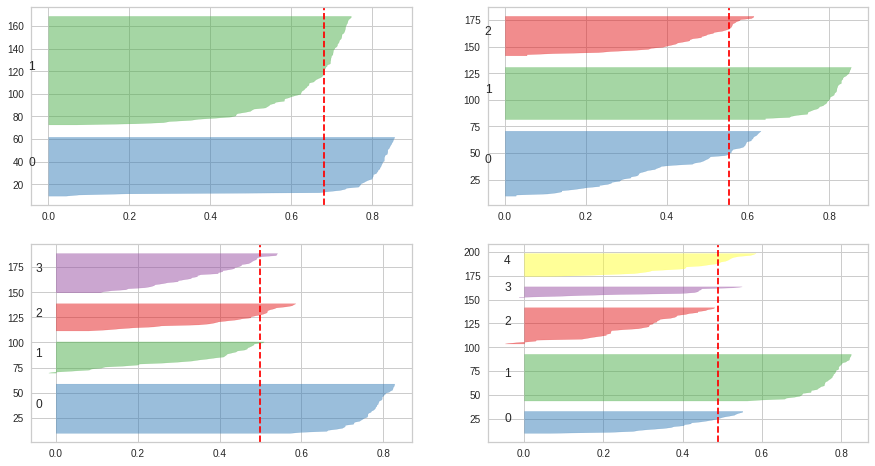

In [ ]:
##Using Silhoutte Score determine optimum number of clusters
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2,6):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

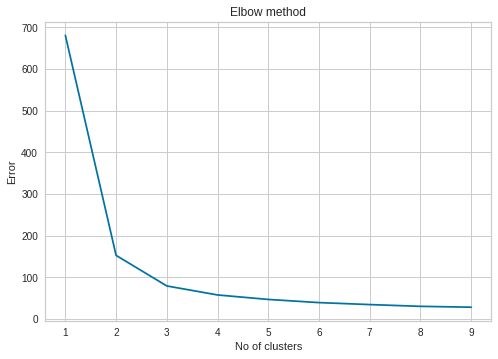

In [ ]:
##Elbow method to determine optimum number of clusters
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
##########  SECTION 5 - Building the model with the optimum number of clusters ##########

In [ ]:
##Implementing KMeans Clustering -  unsupervised algorithms
K_means_model = KMeans(n_clusters = 3)
output = K_means_model.fit_predict(x)
print(output)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
##Showing the Cluster centers
K_means_model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [ ]:
##########  SECTION 6 - Visualizing the Clustering output from the Model ##########

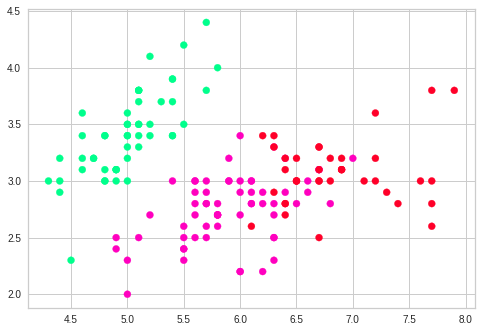

In [ ]:
##Plotting the clustered output 
plt.scatter(x[:,0],x[:,1],c = output,cmap='gist_rainbow')